<class 'pandas.core.frame.DataFrame'>
Index: 2180 entries, 45 to 2337
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           2180 non-null   object 
 1   year             2180 non-null   int64  
 2   poverty_percent  2180 non-null   float64
 3   region_standard  2180 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 85.2+ KB
None

Пропуски по колонкам:
 region             0
year               0
poverty_percent    0
region_standard    0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 26

Статистика процента бедности:
 count    2180.000000
mean       21.468119
std        12.838582
min         0.000000
25%        13.200000
50%        17.900000
75%        26.425000
max        98.400000
Name: poverty_percent, dtype: float64

Количество дубликатов: 0

Количество выбросов: 124

Топ-5 записей:
            region_standard  year  poverty_percent
1051  Республика Ингушетия  1995

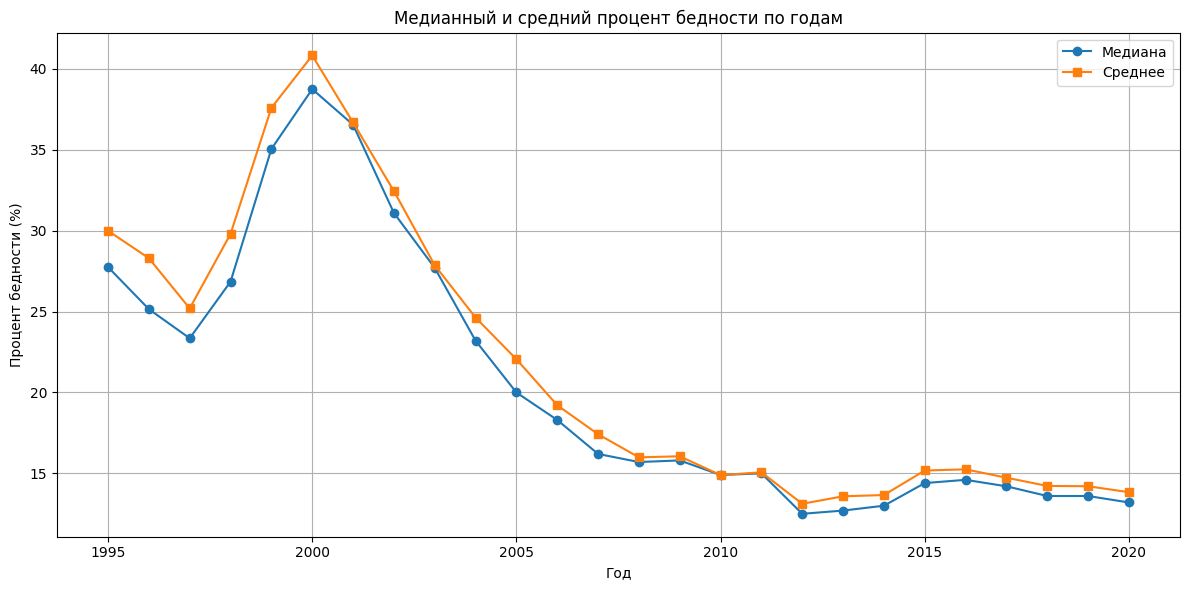

<Figure size 1600x600 with 0 Axes>

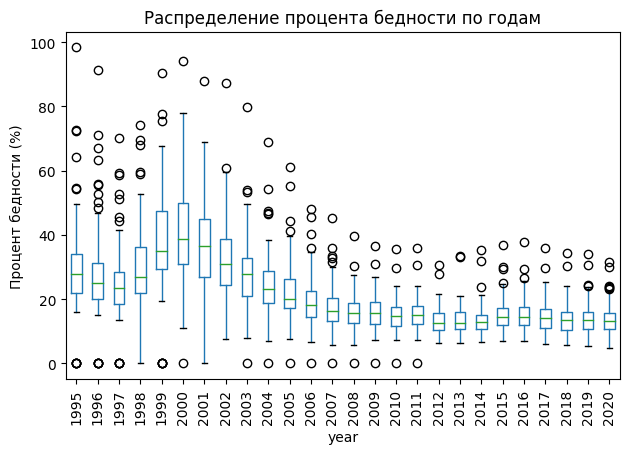

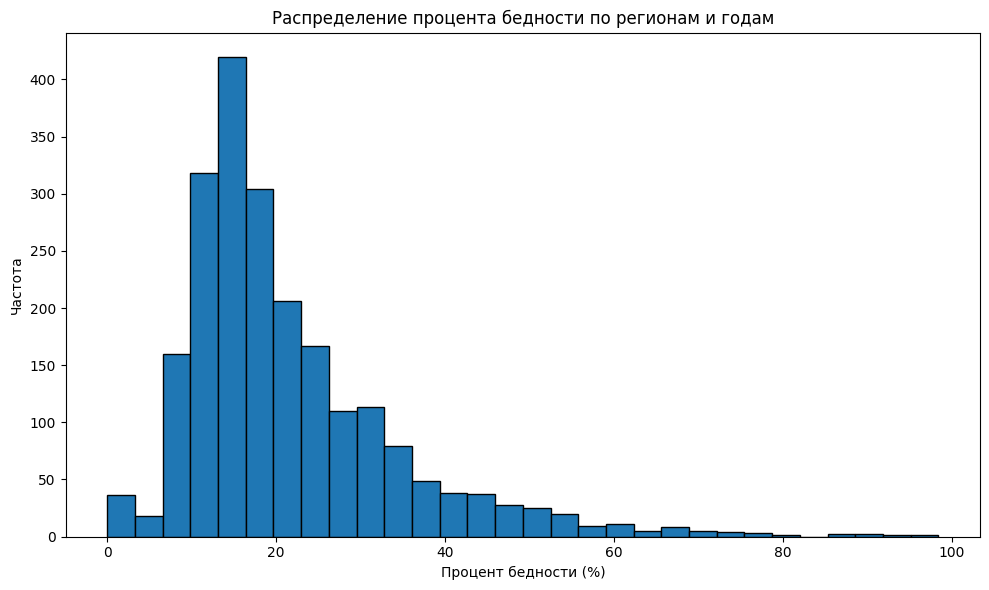

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/poverty_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные регионы и годы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())

# 5. Статистика по проценту бедности
print("\nСтатистика процента бедности:\n", df["poverty_percent"].describe())

# 6. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 7. Проверка выбросов через IQR
Q1 = df["poverty_percent"].quantile(0.25)
Q3 = df["poverty_percent"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["poverty_percent"] < lower_bound) | (df["poverty_percent"] > upper_bound)]
print("\nКоличество выбросов:", outliers.shape[0])

# 8. Топ-5 по максимальным значениям
top5 = df.sort_values(by="poverty_percent", ascending=False).head(5)
print("\nТоп-5 записей:\n", top5[["region_standard", "year", "poverty_percent"]])

# 9. Тренды медианы и среднего
median_poverty = df.groupby("year")["poverty_percent"].median()
mean_poverty = df.groupby("year")["poverty_percent"].mean()

plt.figure(figsize=(12,6))
plt.plot(median_poverty.index, median_poverty.values, marker="o", label="Медиана")
plt.plot(mean_poverty.index, mean_poverty.values, marker="s", label="Среднее")
plt.title("Медианный и средний процент бедности по годам")
plt.xlabel("Год")
plt.ylabel("Процент бедности (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Boxplot
plt.figure(figsize=(16,6))
df.boxplot(column="poverty_percent", by="year", grid=False, rot=90)
plt.title("Распределение процента бедности по годам")
plt.suptitle("")
plt.ylabel("Процент бедности (%)")
plt.tight_layout()
plt.show()

# 11. Гистограмма
plt.figure(figsize=(10,6))
plt.hist(df["poverty_percent"], bins=30, edgecolor="black")
plt.title("Распределение процента бедности по регионам и годам")
plt.xlabel("Процент бедности (%)")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `poverty_standardized.csv` (только строки с region_standard)

**Описание данных**
- 2,180 записей по 85 регионам.
- Период наблюдений: 1995–2021.
- Показатель: процент населения с доходами ниже прожиточного минимума.

---

**Типы данных**
- Все признаки корректны.
  - `year`: int64
  - `poverty_percent`: float64
  - `region_standard`: object

---

**Пропуски**
- Отсутствуют.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее: ~21.5%
- Медиана: ~17.9%
- Минимум: 0%
- Максимум: 98.4%
- 75% значений — до ~26.4%

---

**Выбросы**
- Количество выбросов по IQR: 124 записи.
- Основные пики: Республика Ингушетия в 1990-х годах.
- **Удалять не требуется**, так как данные исторические и реалистичные.

---

**Топ-5 регионов по бедности**
1. Республика Ингушетия (98.4%)
2. Республика Ингушетия (94.3%)
3. Республика Ингушетия (91.4%)
4. Республика Ингушетия (90.5%)
5. Республика Ингушетия (88.0%)

---

**Тренды**
- Наблюдается устойчивое снижение бедности с 1990-х годов.
- Среднее и медианное значение сокращаются.

---

**Вывод**
- Данные очищены от агрегатов и готовы к дальнейшему анализу и объединению.


In [ ]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/poverty_AfterEDA.csv", index=False)